# DIABETES PREDICTION

# Package installation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# EDA

In [3]:
df=pd.read_csv("C:/Users/esham/OneDrive/Desktop/diabetes data.csv")

In [4]:
correlation_matrix=df.corr()

In [5]:
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


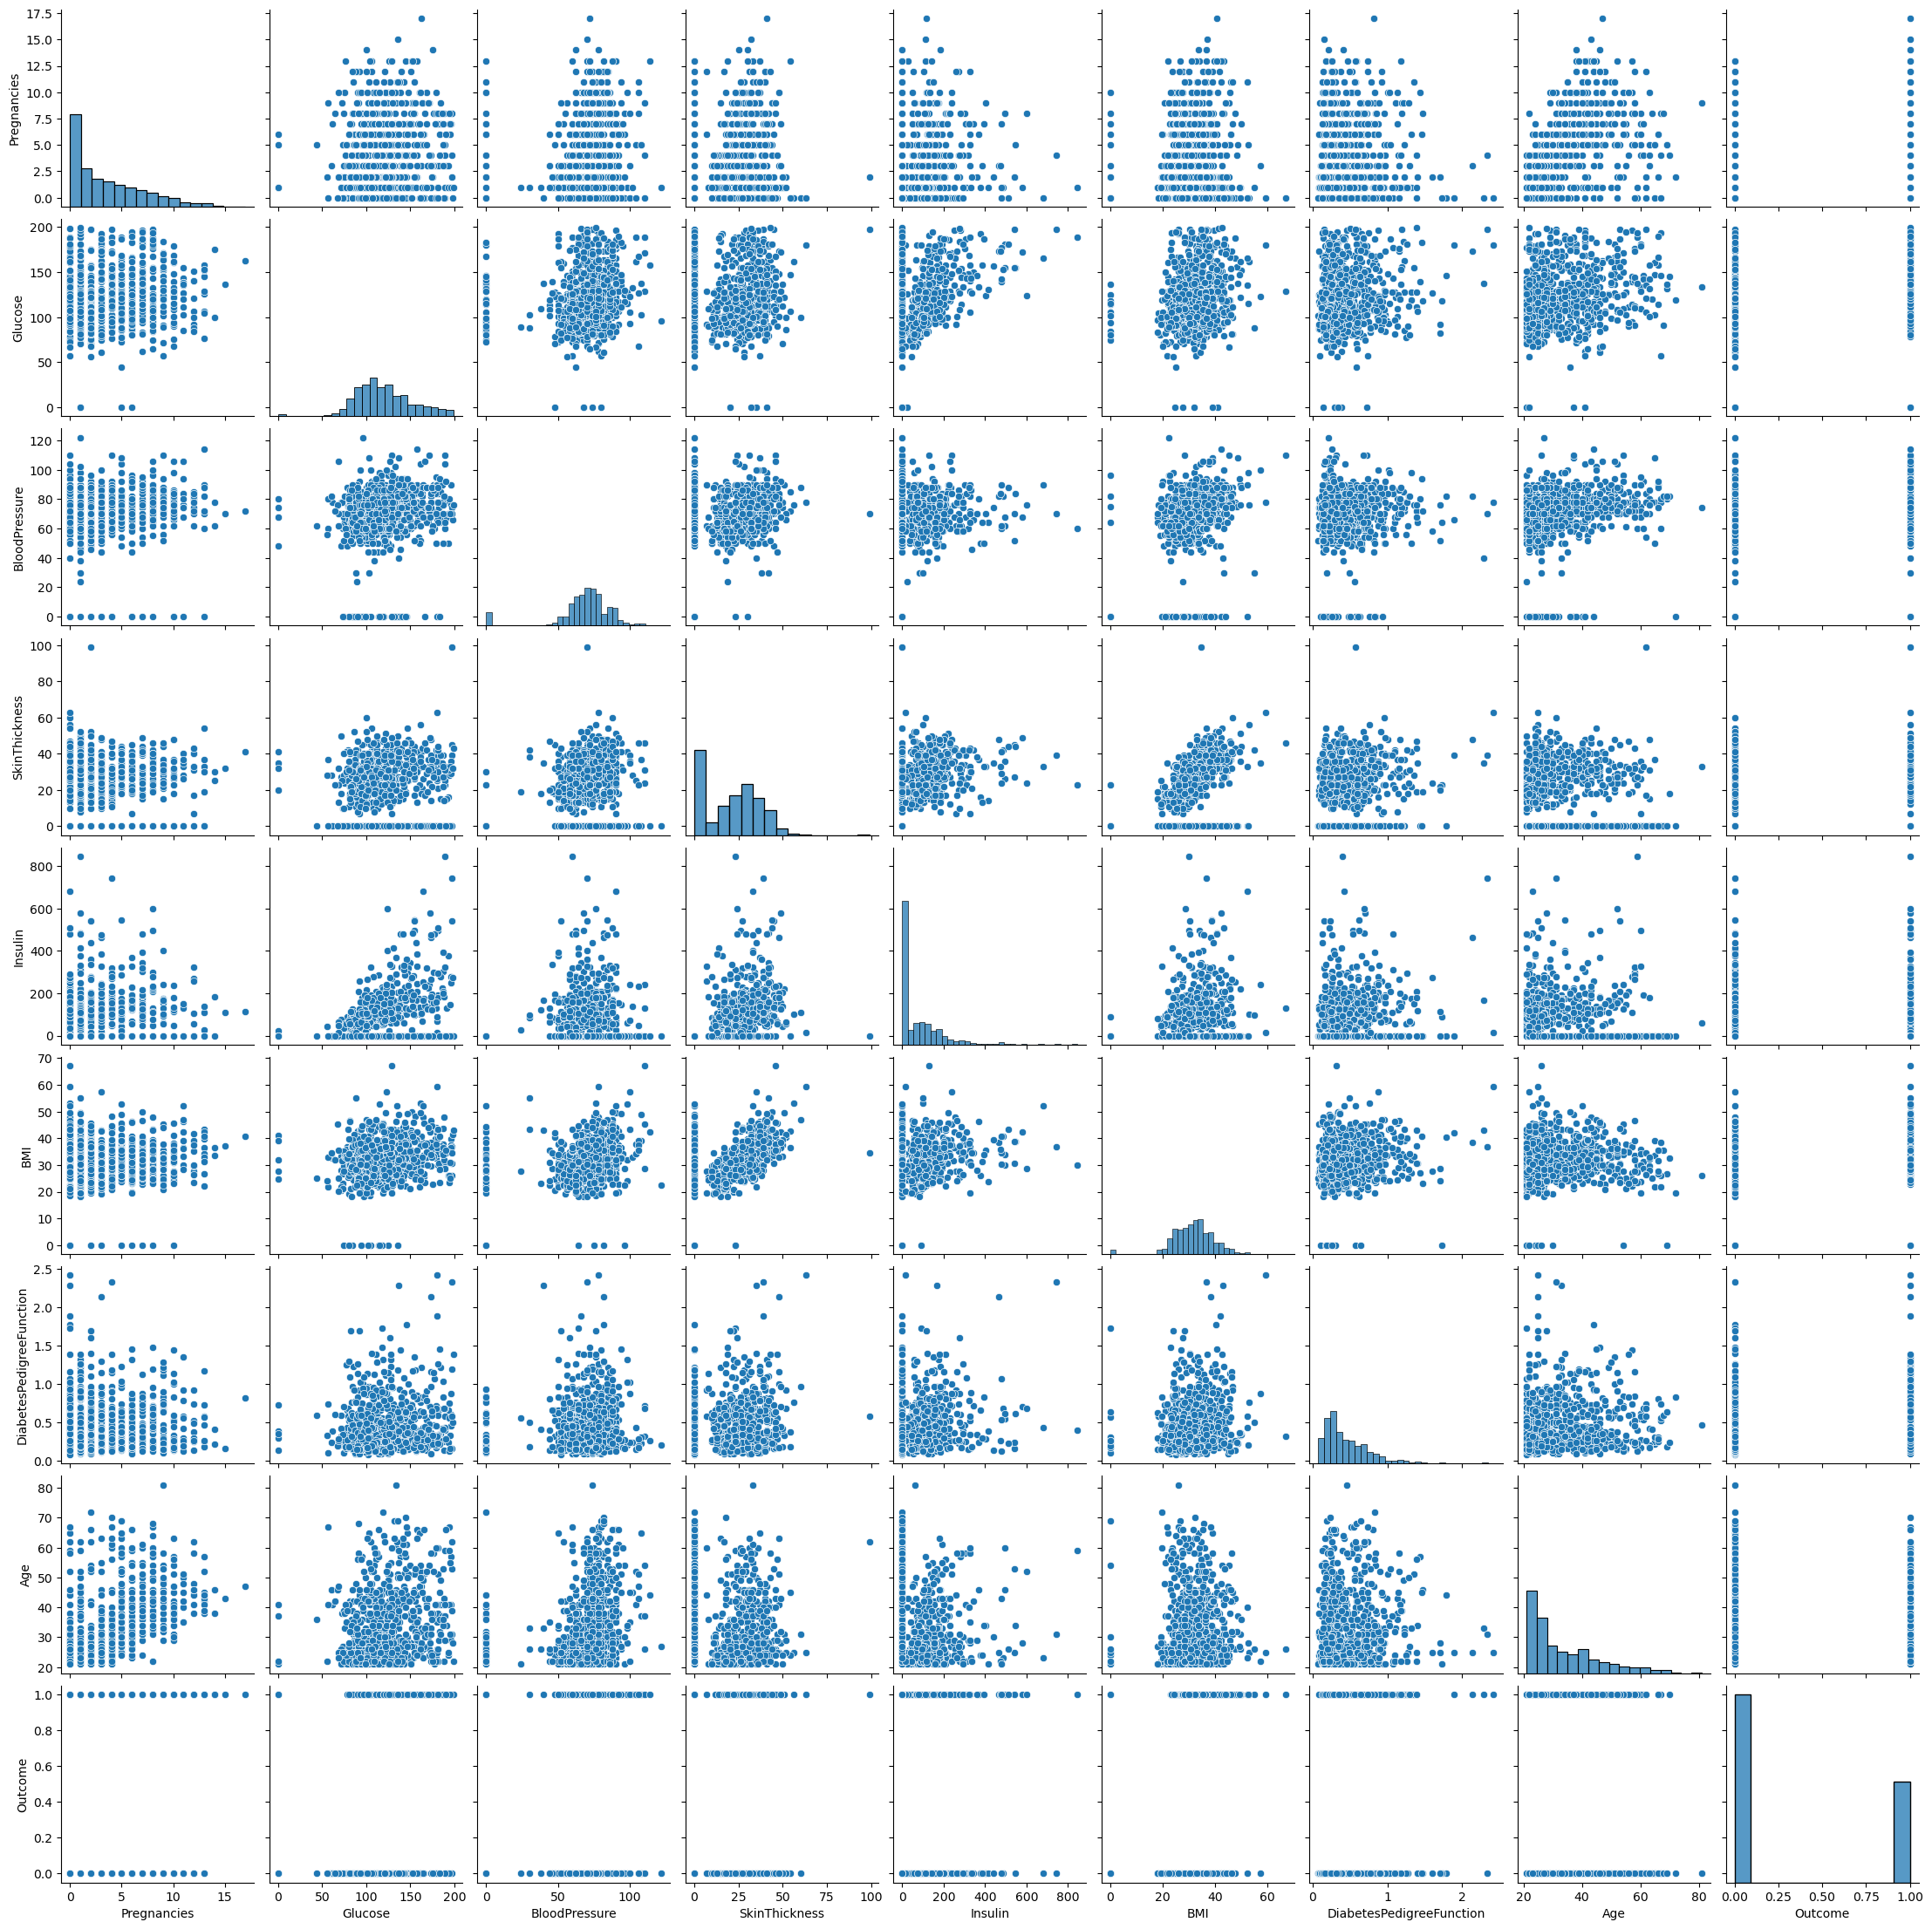

In [6]:
sns.pairplot(df)

# Checking NA values

In [7]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data organization and splitting 

In [10]:
X=df.drop(columns=["Outcome"])
Y=df["Outcome"]    

In [11]:
X.shape

(768, 8)

In [12]:
df.shape

(768, 9)

In [13]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=654,shuffle=True)
scalar=StandardScaler()
X_train_std=scalar.fit_transform(X_train)
X_test_std=scalar.transform(X_test)

# Logistic Regression

In [15]:
X_train_std=sm.add_constant(X_train)
X_test_std=sm.add_constant(X_test)
lr=sm.Logit(Y_train,X_train_std)

In [16]:
lr_result=lr.fit()

Optimization terminated successfully.
         Current function value: 0.469663
         Iterations 6


In [120]:
y_pred_log=lr_result.predict(X_test_std)

In [122]:
y_pred_log

712    0.790897
620    0.185678
622    0.965163
21     0.335722
196    0.065949
         ...   
713    0.115608
30     0.457050
306    0.662119
412    0.543929
26     0.759254
Length: 231, dtype: float64

In [18]:
fpr_log, tpr_log, thresholds_log = roc_curve(Y_test, y_pred_log)

In [19]:
roc_curve(Y_test, y_pred_log)

(array([0.        , 0.        , 0.        , 0.0070922 , 0.0070922 ,
        0.0141844 , 0.0141844 , 0.0212766 , 0.0212766 , 0.02836879,
        0.02836879, 0.04964539, 0.04964539, 0.06382979, 0.06382979,
        0.07092199, 0.07092199, 0.09929078, 0.09929078, 0.12056738,
        0.12056738, 0.15602837, 0.15602837, 0.16312057, 0.16312057,
        0.18439716, 0.18439716, 0.19148936, 0.19148936, 0.19858156,
        0.19858156, 0.23404255, 0.23404255, 0.24113475, 0.24113475,
        0.25531915, 0.25531915, 0.27659574, 0.27659574, 0.28368794,
        0.28368794, 0.30496454, 0.30496454, 0.31205674, 0.31205674,
        0.31914894, 0.31914894, 0.34042553, 0.34042553, 0.35460993,
        0.35460993, 0.36170213, 0.36170213, 0.37588652, 0.37588652,
        0.39716312, 0.39716312, 0.40425532, 0.40425532, 0.41843972,
        0.41843972, 0.5177305 , 0.5177305 , 0.58865248, 0.58865248,
        0.78723404, 0.78723404, 1.        ]),
 array([0.        , 0.01111111, 0.02222222, 0.02222222, 0.1       ,
  

In [20]:
roc_auc_log = auc(fpr_log, tpr_log)
print("AUC: ",roc_auc_log)

AUC:  0.8424743892829


In [21]:
diff_log=tpr_log-fpr_log
best_arg_log=np.argmax(diff_log)
opt_thresold_log=thresholds_log[best_arg_log]
print("Best Threshold:", opt_thresold_log)
print("Corresponding TPR/Sensitivity:", tpr_log[best_arg_log])
print("Corresponding Specificity:", 1-fpr_log[best_arg_log])

Best Threshold: 0.2053855868380612
Corresponding TPR/Sensitivity: 0.9555555555555556
Corresponding Specificity: 0.5815602836879432


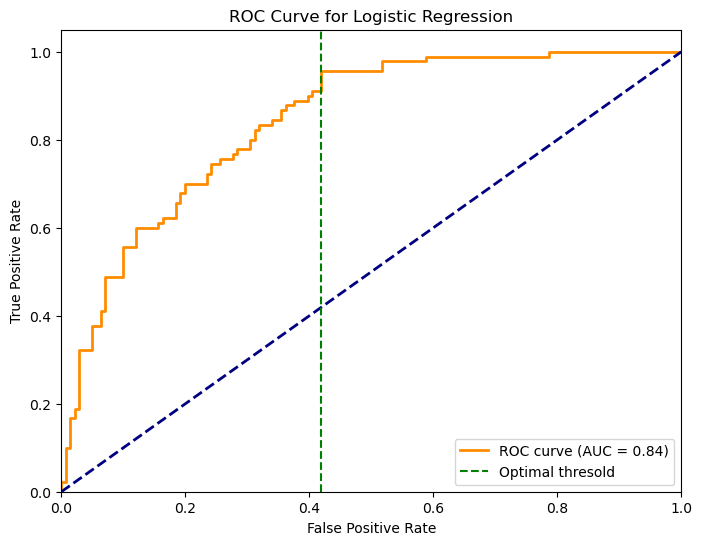

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axvline(x=fpr_log[best_arg_log], color='green', linestyle='--', label='Optimal thresold')
plt.legend(loc='lower right')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [23]:
y_pred_log_binary = (y_pred_log >= opt_thresold_log).astype(int)
f1scoref1 = f1_score(Y_test, y_pred_log_binary)
print("F1 score:", f1scoref1)

F1 score: 0.7319148936170213


In [24]:
lr_result.params

const                      -8.539036
Pregnancies                 0.117989
Glucose                     0.035646
BloodPressure              -0.012605
SkinThickness               0.001262
Insulin                    -0.002289
BMI                         0.092388
DiabetesPedigreeFunction    0.890566
Age                         0.016531
dtype: float64

In [25]:
cm_lr=cm = confusion_matrix(Y_test, y_pred_log_binary)

In [123]:
print(cm_lr)

[[82 59]
 [ 4 86]]


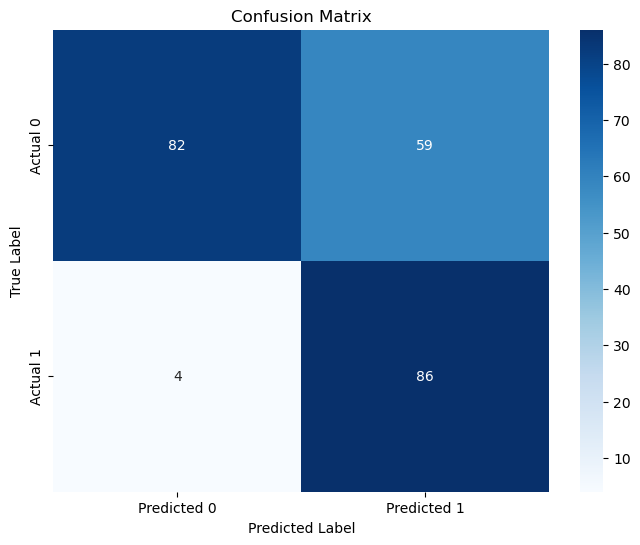

In [126]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbours

In [27]:
k_values=list(range(1,51))
knn_accuracy=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k,weights="distance")
    knn.fit(X_train,Y_train)
    y_pred_knn=knn.predict(X_test)
    knn_accuracy.append(accuracy_score(Y_test,y_pred_knn))

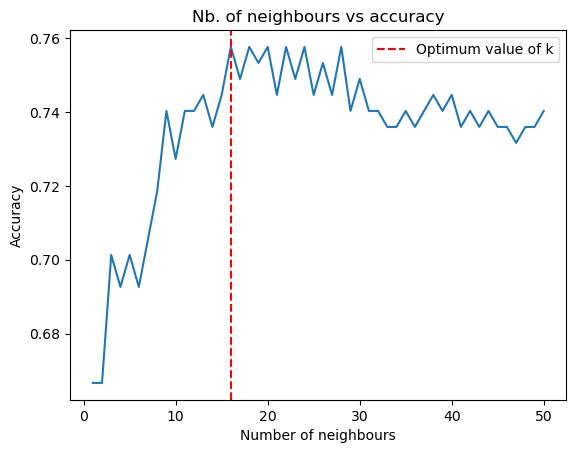

In [28]:
sns.lineplot(x=k_values,y=knn_accuracy)
k_opt=k_values[np.argmax(np.array(knn_accuracy))]
plt.axvline(x=k_opt, color='red', linestyle='--', label='Optimum value of k')
plt.legend()
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.title("Nb. of neighbours vs accuracy")
plt.show()

In [29]:
knn=KNeighborsClassifier(n_neighbors=16,weights="distance")
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)

In [30]:
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [31]:
diff_knn=tpr_knn-fpr_knn
best_arg_knn=np.argmax(diff_knn)
opt_thresold_knn=thresholds_knn[best_arg_knn]
print("Best Threshold:", opt_thresold_knn)
print("Corresponding TPR/Sensitivity:", tpr_knn[best_arg_knn])
print("Corresponding Specificity:", 1-fpr_knn[best_arg_knn])

Best Threshold: 0.4614796250730647
Corresponding TPR/Sensitivity: 0.5888888888888889
Corresponding Specificity: 0.8581560283687943


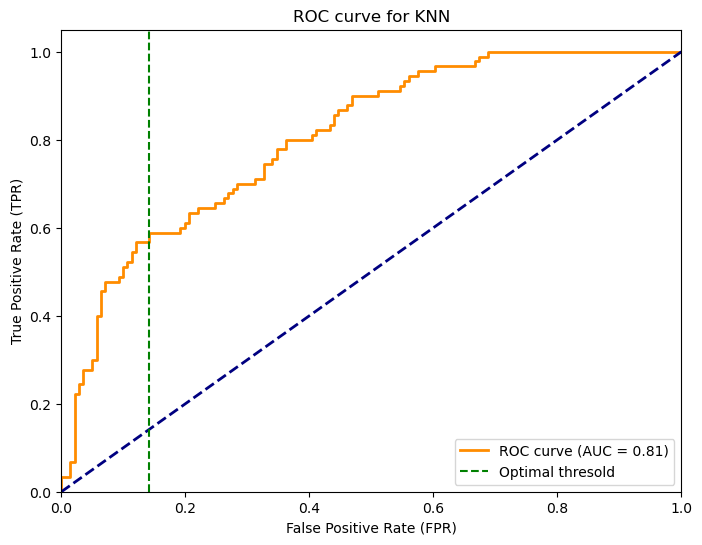

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.axvline(x=fpr_knn[best_arg_knn], color='green', linestyle='--', label='Optimal thresold')
plt.legend(loc='lower right')
plt.title('ROC curve for KNN')
plt.legend(loc='lower right')
plt.show()

In [33]:
y_pred_knn_binary = (y_prob_knn >= thresholds_knn[best_arg_knn]).astype(int)
f1scoref1 = f1_score(Y_test, y_pred_knn_binary)
print("F1 score:", f1scoref1)

F1 score: 0.6503067484662578


# Test of Normality

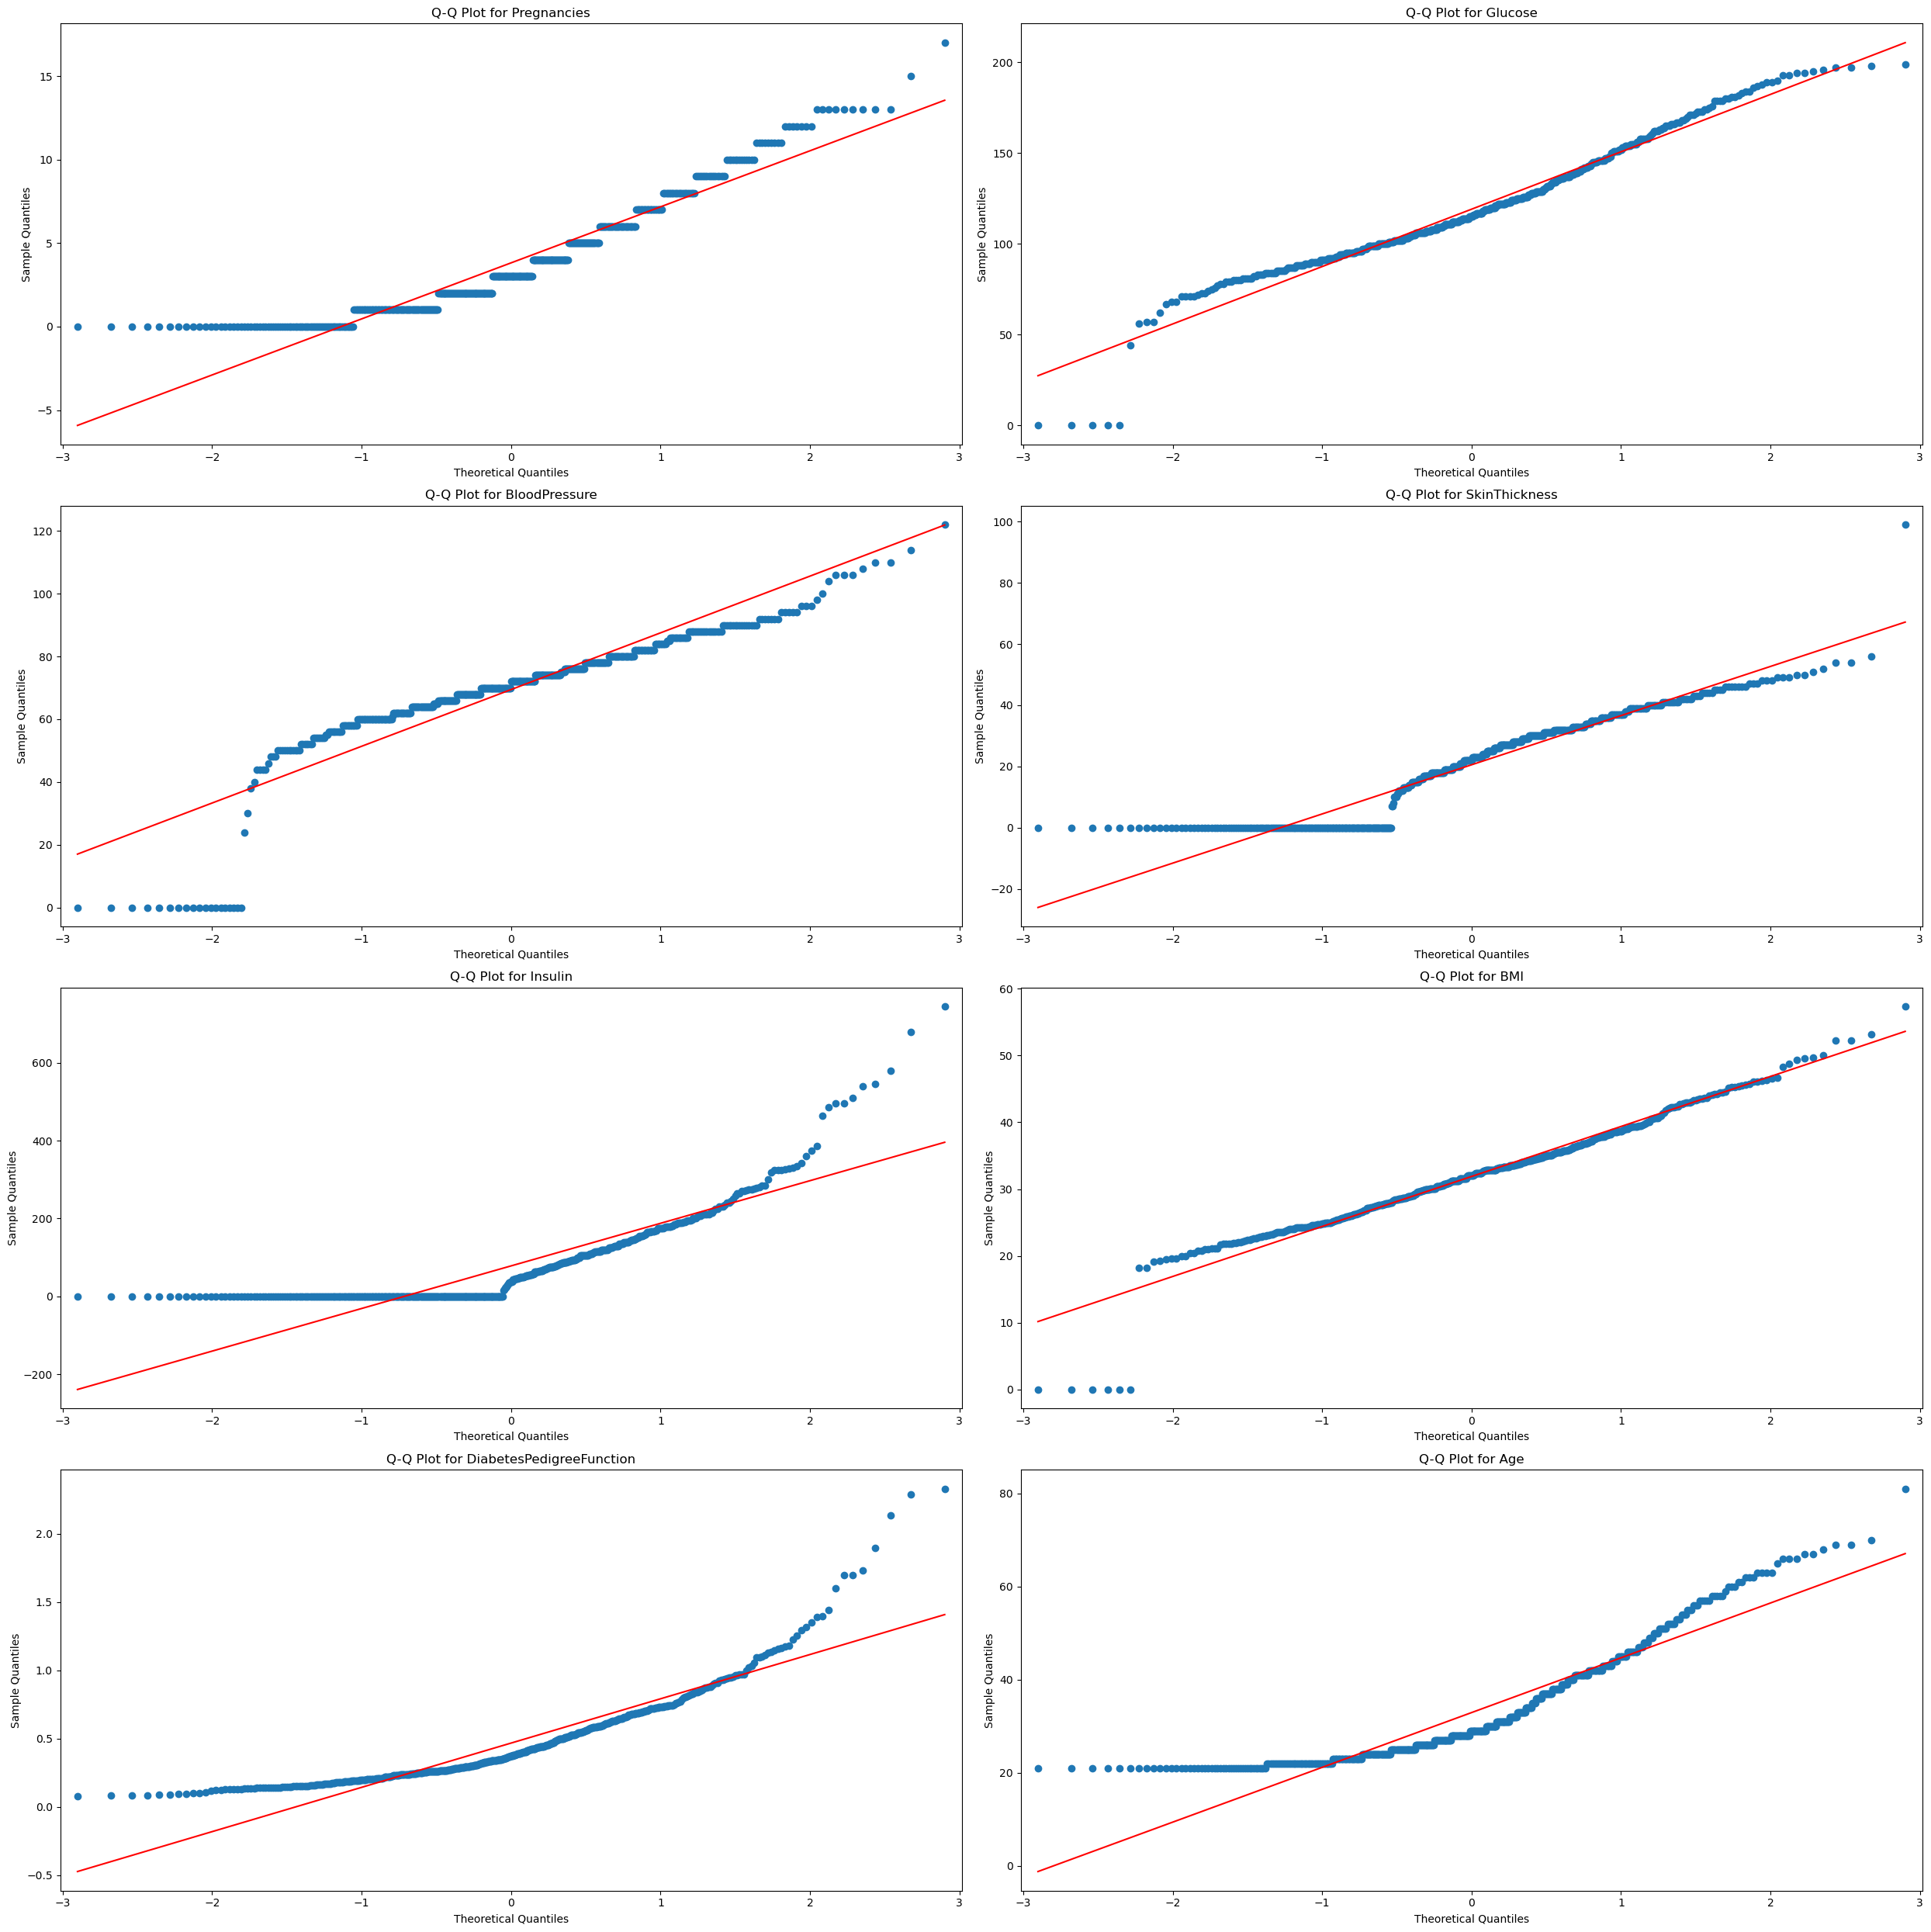

In [37]:
num_rows, num_cols = 4, 2
numeric_columns = X_train.columns
# Create a grid of Q-Q plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Loop through the numeric columns and create Q-Q plots in the grid
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, num_cols)  # Calculate the row and column index
    ax = axes[row, col]  # Get the current subplot
    sm.qqplot(X_train[column], line='s', ax=ax)
    ax.set_title(f'Q-Q Plot for {column}')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

# LDA

In [38]:
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train,Y_train)


LinearDiscriminantAnalysis(store_covariance=True)

In [39]:
lda.coef_

array([[ 0.12438976,  0.03713385, -0.01221308,  0.00211818, -0.00249222,
         0.08890163,  0.93452179,  0.01840083]])

In [40]:
lda.predict_proba(X_test).shape

(231, 2)

In [41]:
y_prob_lda=lda.predict_proba(X_test)[:,1]

In [42]:
fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, y_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

In [43]:
roc_auc_lda

0.8426319936958234

In [44]:
diff_lda=tpr_lda-fpr_lda
best_arg_lda=np.argmax(diff_lda)
opt_thresold_lda=thresholds_lda[best_arg_lda]
print("Best Threshold:", opt_thresold_lda)
print("Corresponding TPR/Sensitivity:", tpr_lda[best_arg_lda])
print("Corresponding Specificity:", 1-fpr_lda[best_arg_lda])

Best Threshold: 0.19660891986862056
Corresponding TPR/Sensitivity: 0.9555555555555556
Corresponding Specificity: 0.574468085106383


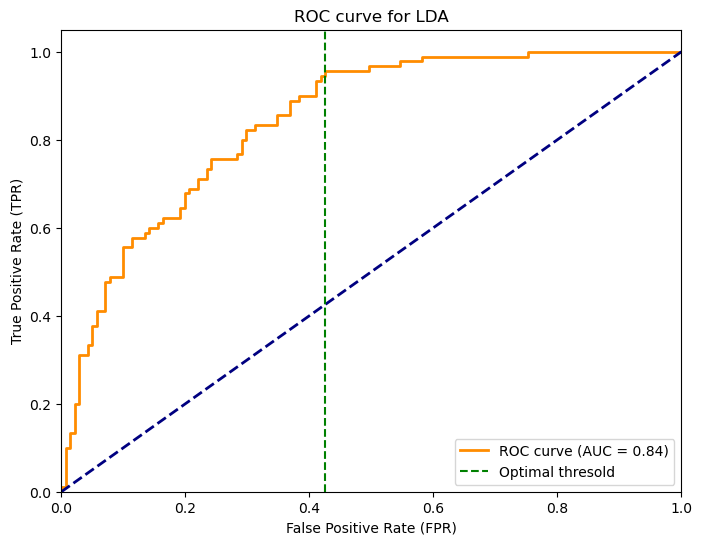

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.axvline(x=fpr_lda[best_arg_lda], color='green', linestyle='--', label='Optimal thresold')
plt.legend(loc='lower right')
plt.title('ROC curve for LDA')
plt.legend(loc='lower right')
plt.show()

In [46]:
y_pred_lda_binary = (y_prob_lda >= thresholds_lda[best_arg_lda]).astype(int)
f1scoref1 = f1_score(Y_test, y_pred_lda_binary)
print("F1 score:", f1scoref1)

F1 score: 0.728813559322034


# QDA

In [47]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train,Y_train)

QuadraticDiscriminantAnalysis()

In [48]:
y_prob_qda=qda.predict_proba(X_test)[:,1]

In [49]:
fpr_qda, tpr_qda, thresholds_qda = roc_curve(Y_test, y_prob_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

In [50]:
diff_qda=tpr_qda-fpr_qda
best_arg_qda=np.argmax(diff_qda)
opt_thresold_qda=thresholds_qda[best_arg_qda]
print("Best Threshold:", opt_thresold_qda)
print("Corresponding TPR/Sensitivity:", tpr_qda[best_arg_qda])
print("Corresponding Specificity:", 1-fpr_qda[best_arg_qda])

Best Threshold: 0.1757112643115787
Corresponding TPR/Sensitivity: 0.9111111111111111
Corresponding Specificity: 0.5886524822695036


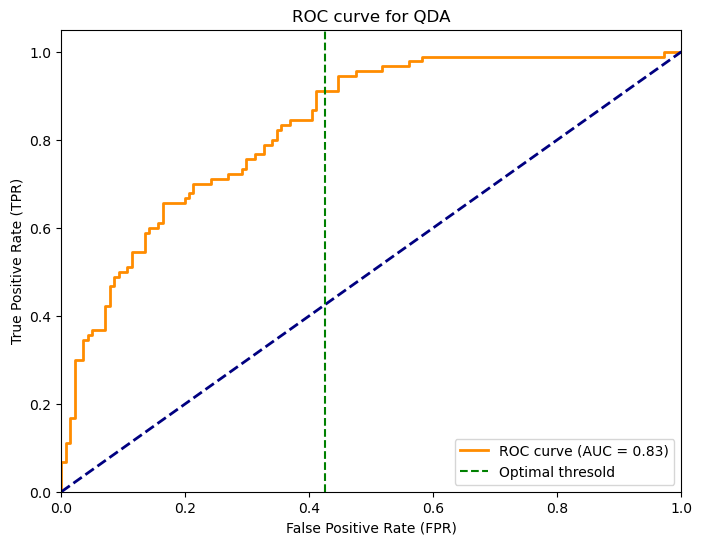

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_qda, tpr_qda, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_qda))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.axvline(x=fpr_lda[best_arg_lda], color='green', linestyle='--', label='Optimal thresold')
plt.legend(loc='lower right')
plt.title('ROC curve for QDA')
plt.legend(loc='lower right')
plt.show()

In [52]:
y_pred_qda_binary = (y_prob_qda >= thresholds_qda[best_arg_qda]).astype(int)
f1scoref1 = f1_score(Y_test, y_pred_qda_binary)
print("F1 score:", f1scoref1)

F1 score: 0.7130434782608697


# Naive Bayes

In [53]:
nb=GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [54]:
y_prob_nb=nb.predict_proba(X_test)[:,1]

In [55]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [56]:
diff_nb=tpr_nb-fpr_nb
best_arg_nb=np.argmax(diff_nb)
opt_thresold_nb=thresholds_nb[best_arg_nb]
print("Best Threshold:", opt_thresold_nb)
print("Corresponding TPR/Sensitivity:", tpr_nb[best_arg_nb])
print("Corresponding Specificity:", 1-fpr_nb[best_arg_nb])

Best Threshold: 0.5096663077650604
Corresponding TPR/Sensitivity: 0.6888888888888889
Corresponding Specificity: 0.8085106382978724


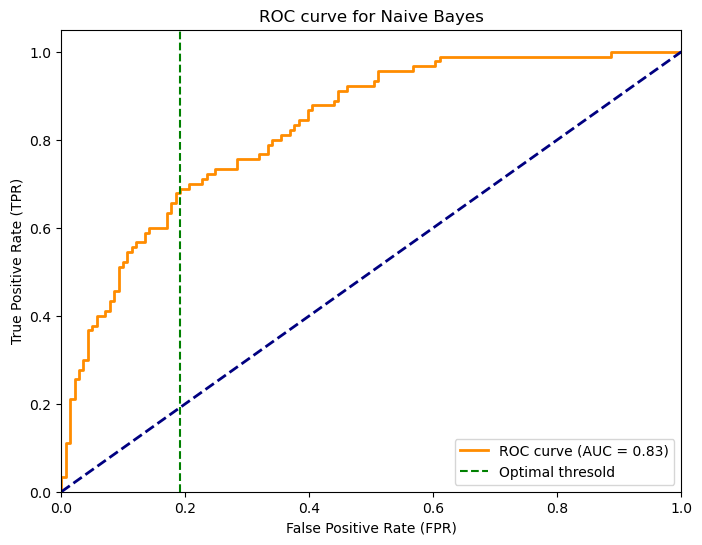

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.axvline(x=fpr_nb[best_arg_nb], color='green', linestyle='--', label='Optimal thresold')
plt.legend(loc='lower right')
plt.title('ROC curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [58]:
y_pred_nb_binary = (y_prob_nb >= thresholds_nb[best_arg_nb]).astype(int)
f1scoref1 = f1_score(Y_test, y_pred_nb_binary)
print("F1 score:", f1scoref1)

F1 score: 0.6927374301675977


# Decision tree

In [72]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,Y,test_size=0.3,random_state=654,shuffle=True)

In [73]:
dtree=DecisionTreeClassifier()

In [74]:
depth=list(range(1,20))
leaf=list(range(2,30))
parameter={
    #'max_depth':depth
    'max_leaf_nodes':leaf
}
cv=GridSearchCV(dtree,param_grid=parameter,scoring="accuracy",cv=10)

In [75]:
cv.fit(X1_train,Y1_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [76]:
cv.best_params_

{'max_leaf_nodes': 5}

In [77]:
cv.best_score_

0.7541928721174005

In [78]:
dtree1=DecisionTreeClassifier(max_leaf_nodes=5)

In [79]:
dtree1.fit(X1_train,Y1_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [80]:
y_prob_dtree1=dtree1.predict_proba(X1_test)[:,1]

In [81]:
y_prob_dtree1

array([0.33018868, 0.11013216, 0.72649573, 0.33018868, 0.11013216,
       0.11013216, 0.72649573, 0.11013216, 0.72649573, 0.64583333,
       0.72649573, 0.11013216, 0.72649573, 0.33018868, 0.11013216,
       0.72649573, 0.72649573, 0.72649573, 0.11013216, 0.11013216,
       0.64583333, 0.11013216, 0.72649573, 0.72649573, 0.64583333,
       0.33018868, 0.72649573, 0.33018868, 0.11013216, 0.72649573,
       0.11013216, 0.72649573, 0.33018868, 0.11013216, 0.11013216,
       0.72649573, 0.11013216, 0.33018868, 0.11013216, 0.11013216,
       0.11013216, 0.11013216, 0.11013216, 0.11013216, 0.64583333,
       0.11013216, 0.11013216, 0.11013216, 0.72649573, 0.11013216,
       0.33018868, 0.72649573, 0.11013216, 0.11013216, 0.05128205,
       0.11013216, 0.11013216, 0.33018868, 0.33018868, 0.11013216,
       0.72649573, 0.72649573, 0.33018868, 0.64583333, 0.33018868,
       0.72649573, 0.33018868, 0.64583333, 0.72649573, 0.72649573,
       0.11013216, 0.11013216, 0.33018868, 0.11013216, 0.33018

In [82]:
fpr_dtree1, tpr_dtree1, thresholds_dtree1 = roc_curve(Y1_test, y_prob_dtree1)
roc_auc_dtree1 = auc(fpr_dtree1, tpr_dtree1)

In [83]:
diff_dtree1=tpr_dtree1-fpr_dtree1
best_arg_dtree1=np.argmax(diff_dtree1)
opt_thresold_dtree1=thresholds_dtree1[best_arg_dtree1]
print("Best Threshold:", opt_thresold_dtree1)
print("Corresponding TPR/Sensitivity:", tpr_dtree1[best_arg_dtree1])
print("Corresponding Specificity:", 1-fpr_dtree1[best_arg_dtree1])

Best Threshold: 0.6458333333333334
Corresponding TPR/Sensitivity: 0.6444444444444445
Corresponding Specificity: 0.7730496453900709


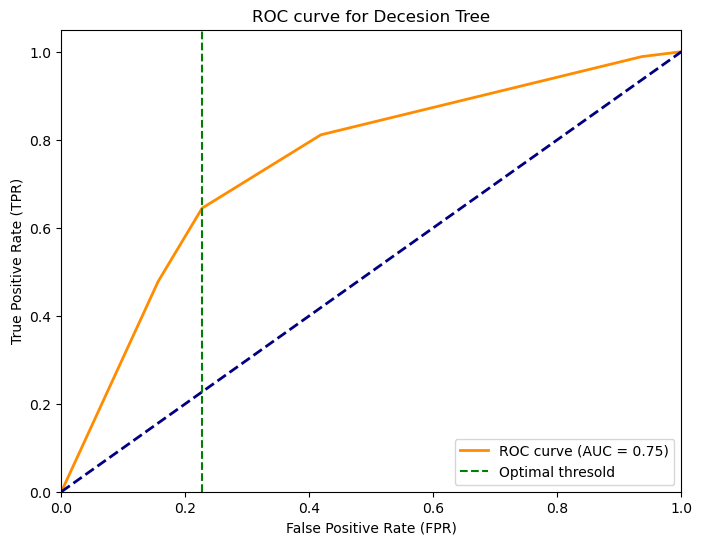

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree1, tpr_dtree1, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dtree1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.axvline(x=fpr_dtree1[best_arg_dtree1], color='green', linestyle='--', label='Optimal thresold')
plt.legend(loc='lower right')
plt.title('ROC curve for Decesion Tree')
plt.legend(loc='lower right')
plt.show()

In [85]:
y_pred_dtree1_binary = (y_prob_dtree1 >= thresholds_dtree1[best_arg_dtree1]).astype(int)
f1scoref1 = f1_score(Y_test, y_pred_dtree1_binary)
print("F1 score:", f1scoref1)

F1 score: 0.6444444444444445


In [86]:
dtree1.feature_importances_

array([0.        , 0.62778065, 0.        , 0.        , 0.        ,
       0.11913133, 0.08852625, 0.16456178])

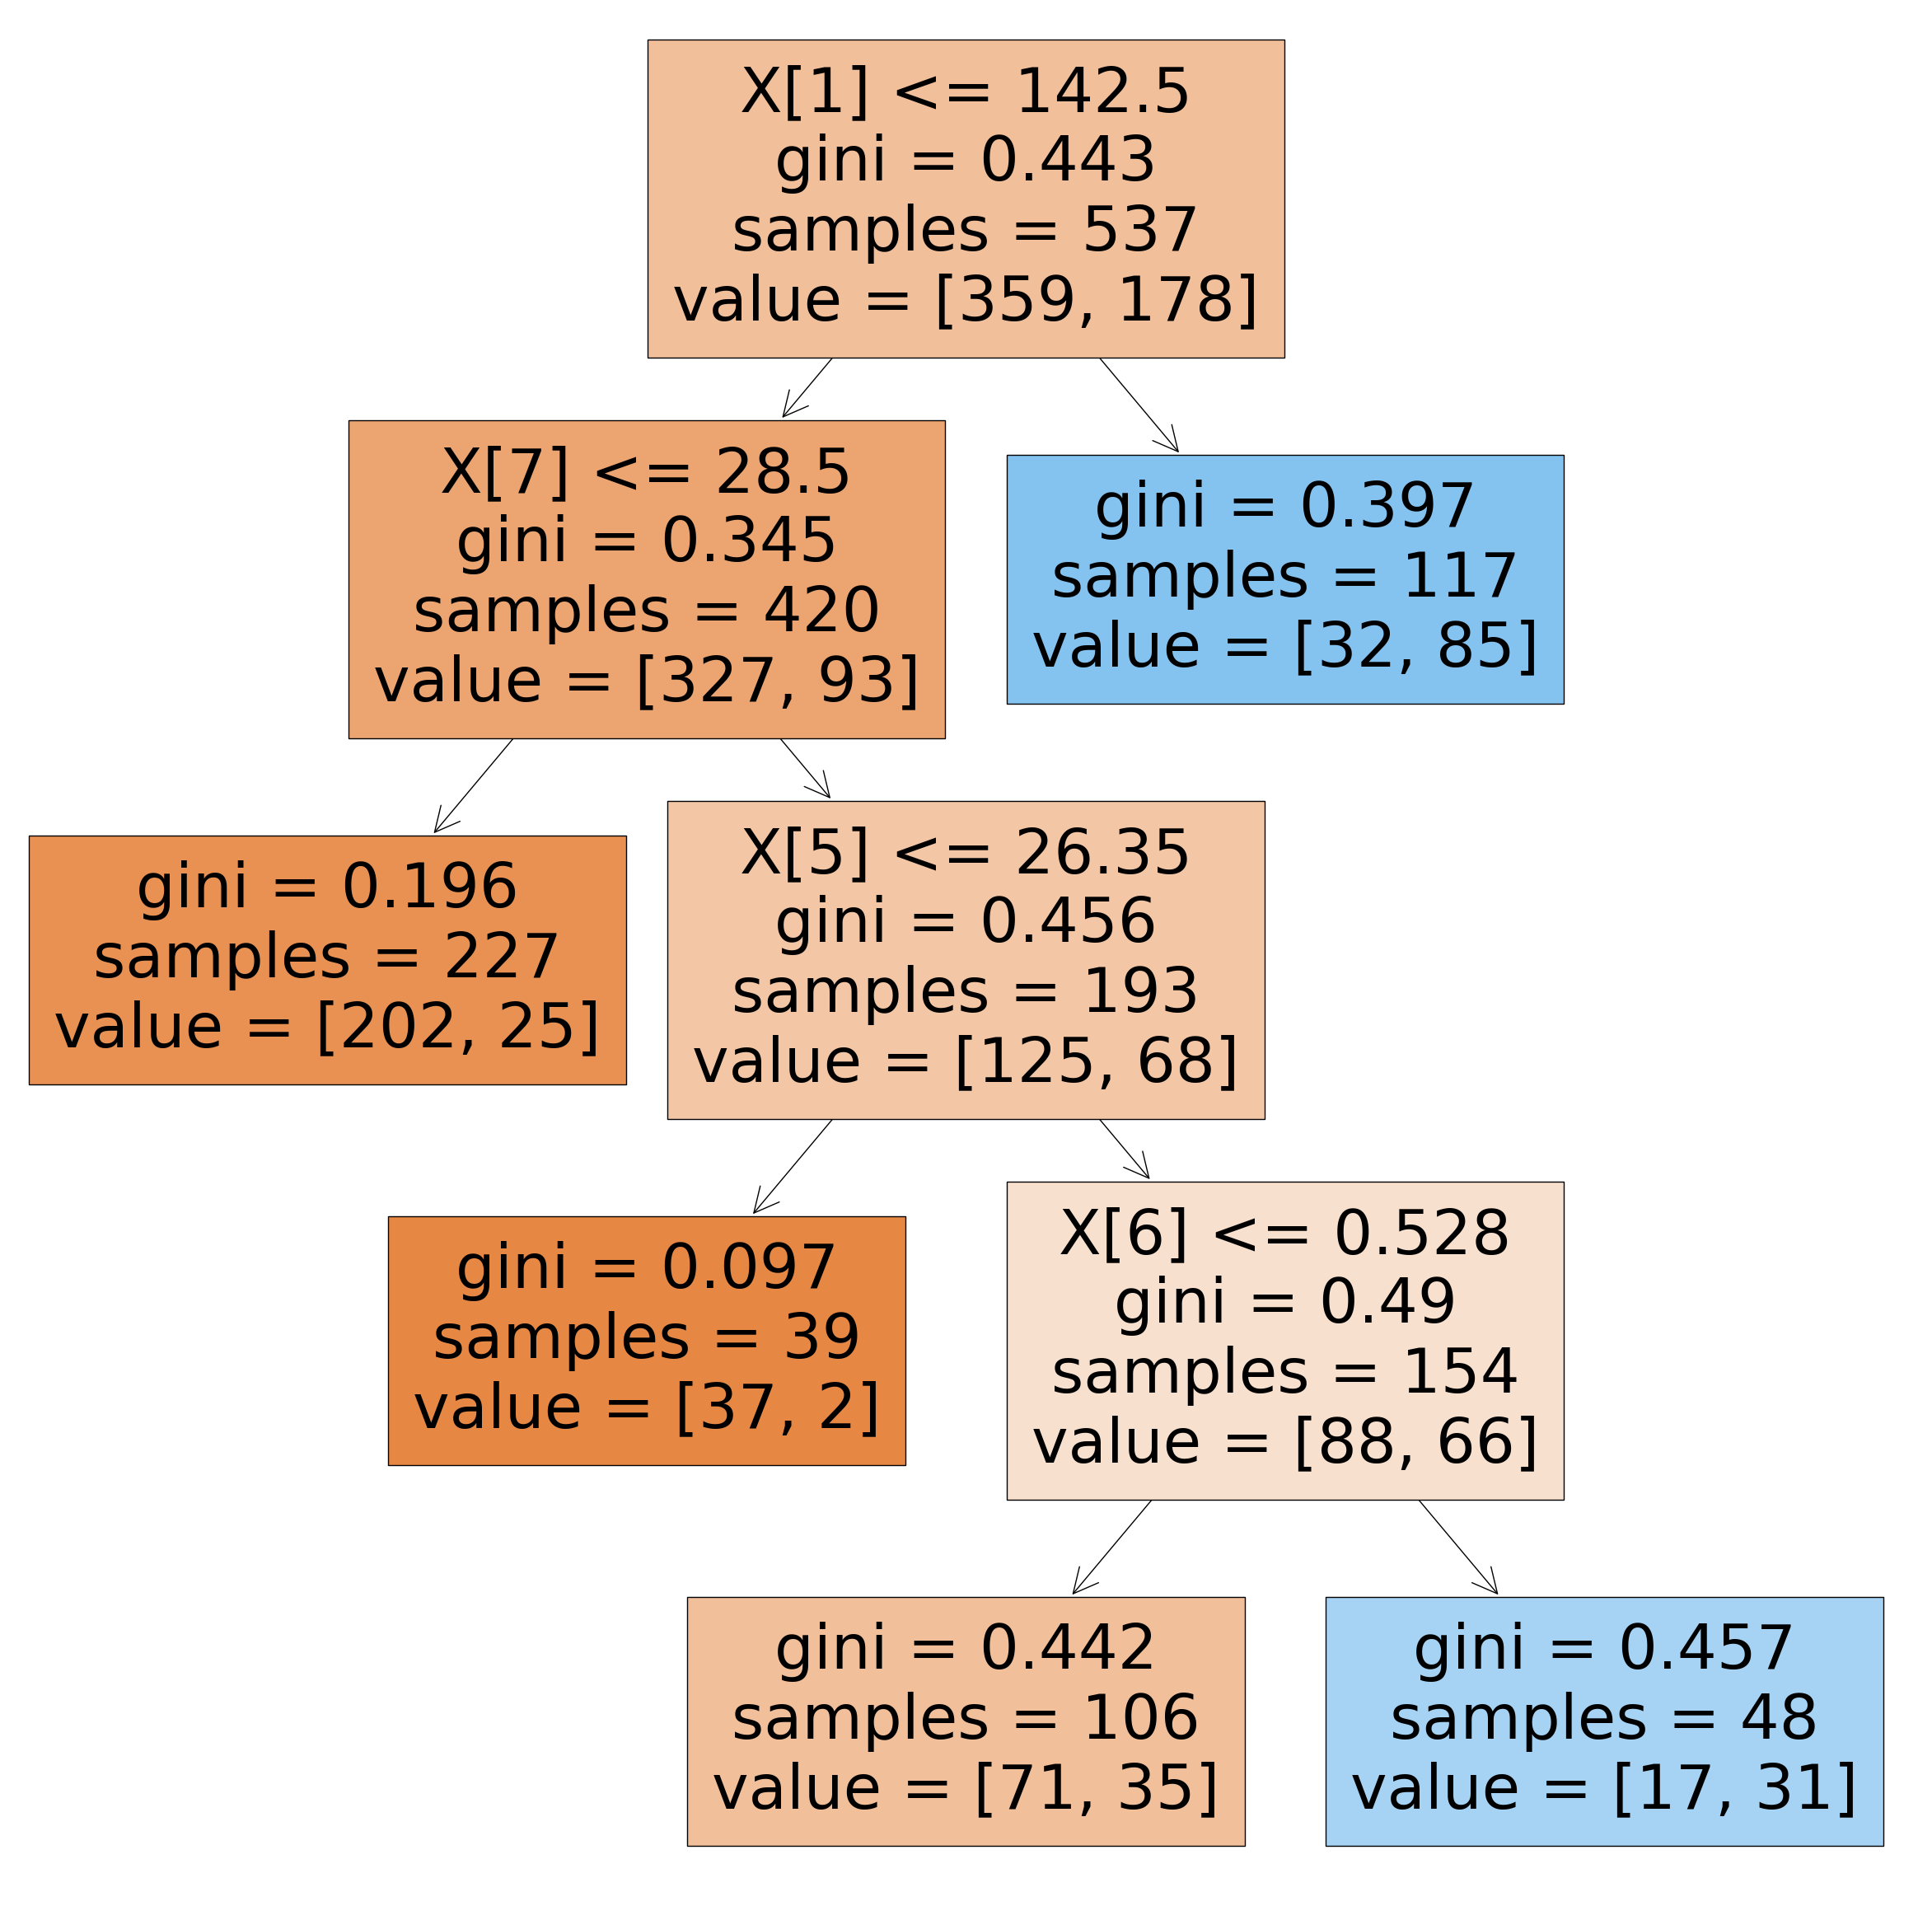

In [87]:
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
plot_tree(dtree1, filled=True)
#plt.title("Regression tree before pruning")
plt.show()

# Random Forest 

In [102]:
rf=RandomForestClassifier(n_estimators=200,max_leaf_nodes=5)

In [103]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_leaf_nodes=5, n_estimators=200)

In [104]:
y_prob_rf=rf.predict_proba(X_test)[:,1]

In [105]:
y_prob_rf

array([0.47619183, 0.30694895, 0.65839003, 0.37491939, 0.11607731,
       0.26715953, 0.6257029 , 0.17578616, 0.53438679, 0.5313084 ,
       0.65497787, 0.13141459, 0.47786933, 0.25148732, 0.26069565,
       0.5741818 , 0.67103913, 0.61226662, 0.38343457, 0.30529389,
       0.49405446, 0.2098316 , 0.63249341, 0.68915239, 0.39349845,
       0.45852949, 0.61071765, 0.2984556 , 0.26017952, 0.63787579,
       0.17223026, 0.68205651, 0.29858535, 0.11844045, 0.25603447,
       0.45410499, 0.16242414, 0.46435111, 0.15950195, 0.11854262,
       0.22324505, 0.41621095, 0.13864865, 0.11884235, 0.41808499,
       0.10777581, 0.12840978, 0.22914704, 0.53373157, 0.22714955,
       0.35349194, 0.57557632, 0.2474406 , 0.37288938, 0.23060023,
       0.24600531, 0.14033246, 0.40809966, 0.34502189, 0.11745602,
       0.61115424, 0.3461107 , 0.35216308, 0.28889294, 0.33582813,
       0.57791705, 0.37262679, 0.52722026, 0.48630045, 0.24121061,
       0.11496965, 0.28374629, 0.27932435, 0.19772695, 0.46437

In [106]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [107]:
diff_rf=tpr_rf-fpr_rf
best_arg_rf=np.argmax(diff_rf)
opt_thresold_rf=thresholds_rf[best_arg_rf]
print("Best Threshold:", opt_thresold_rf)
print("Corresponding TPR/Sensitivity:", tpr_rf[best_arg_rf])
print("Corresponding Specificity:", 1-fpr_rf[best_arg_rf])

Best Threshold: 0.3521630753510295
Corresponding TPR/Sensitivity: 0.7888888888888889
Corresponding Specificity: 0.7092198581560284


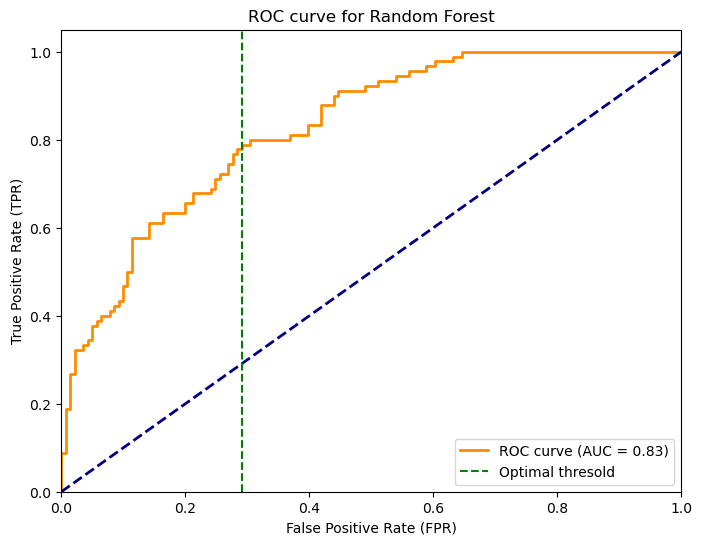

In [108]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.axvline(x=fpr_rf[best_arg_rf], color='green', linestyle='--', label='Optimal thresold')
plt.legend(loc='lower right')
plt.title('ROC curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [109]:
y_prob_rf=rf.predict_proba(X_test)[:,1]
y_pred_rf_binary = (y_prob_rf >= thresholds_rf[best_arg_rf]).astype(int)
f1scoref1 = f1_score(Y_test, y_pred_rf_binary)
print("F1 score:", f1scoref1)

F1 score: 0.7029702970297029


In [116]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X.columns
vif_data1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [117]:
vif_data1

,feature,VIF
0,Pregnancies,3.275748
1,Glucose,16.725078
2,BloodPressure,14.619512
3,SkinThickness,4.008696
4,Insulin,2.063689
5,BMI,18.408884
6,DiabetesPedigreeFunction,3.195626
7,Age,13.492985


In [118]:
vif_data1.mean()

C:\Users\esham\AppData\Local\Temp\ipykernel_29368\2117387394.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vif_data1.mean()


VIF    9.473777
dtype: float64